# Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [3]:
# 본인 구글 드라이브에 업로드한 heart.csv 파일의 주소를 넣어주세요!
heart = pd.read_csv('/content/drive/MyDrive/KUBIG/RawData/heart.csv')

# About Dataset
Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type  
 - Value 1: typical angina  
 - Value 2: atypical angina  
 - Value 3: non-anginal pain  
 - Value 4: asymptomatic  

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results  
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak : previous peak

slp : slope

caa: number of major vessels (0-3)

thall : Thal rate

output : 0= less chance of heart attack 1= more chance of heart attack

# 1. EDA

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# data shape
heart.shape

(303, 14)

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
# checking number of unique value

# 새로운 data frame 만들기
unique_heart = pd.DataFrame(index = heart.columns, columns = ['unique count'])

# 반복문과 loc 함수를 통해 data frame에 열 삽입
for i in list(heart.columns):
  unique_heart.loc[i,'unique count'] = heart[i].value_counts().shape[0]

unique_heart

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Seperating the columns by categorical and numerical

In [9]:
# Seperating the columns by categorical and numerical
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [10]:
# numerical statistics
heart[num_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [11]:
# missing value
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Visualization

### categorical plotting

In [12]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

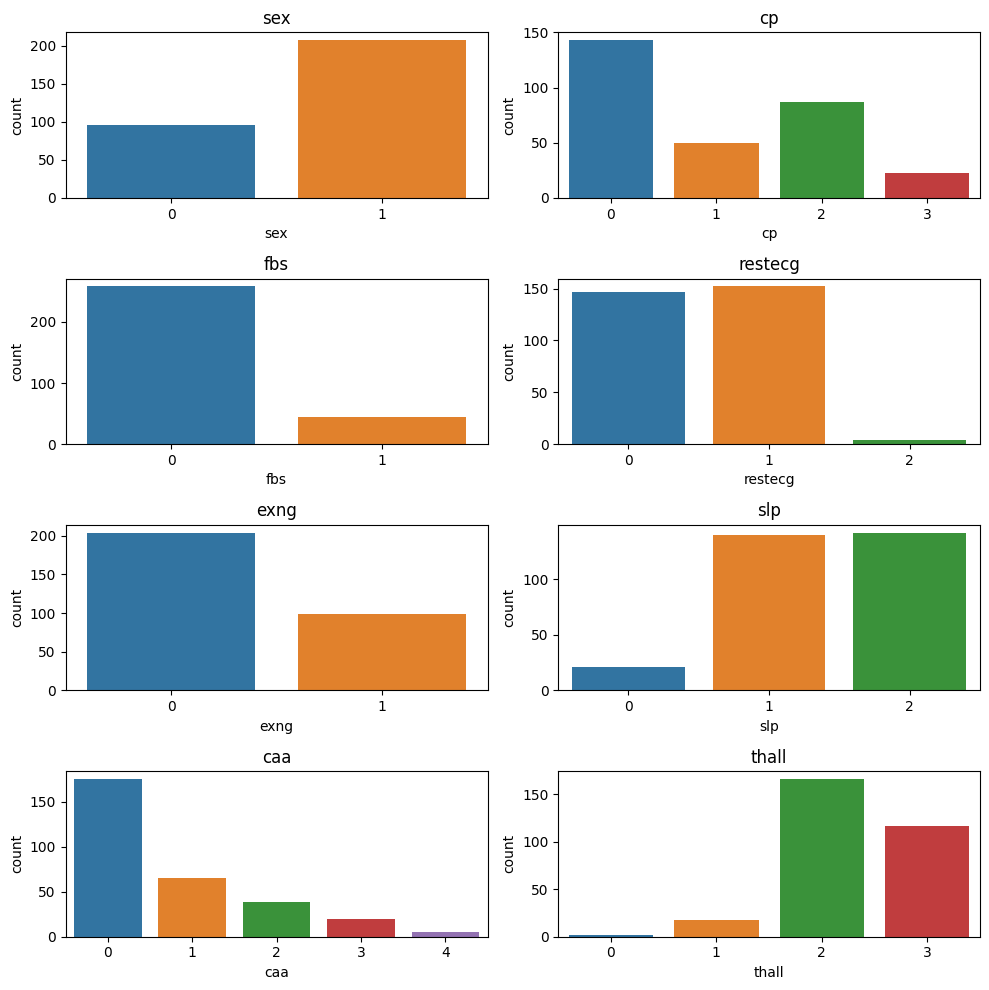

In [16]:
# 8개의 컬럼을 4행 2열의 subplot으로 호출
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data = heart, x = cat_cols[i], ax = ax) # 범주형 -> count plot으로 시각화
  ax.set_title(f'{cat_cols[i]}')

plt.tight_layout()
plt.show()

### numerical plotting

In [17]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

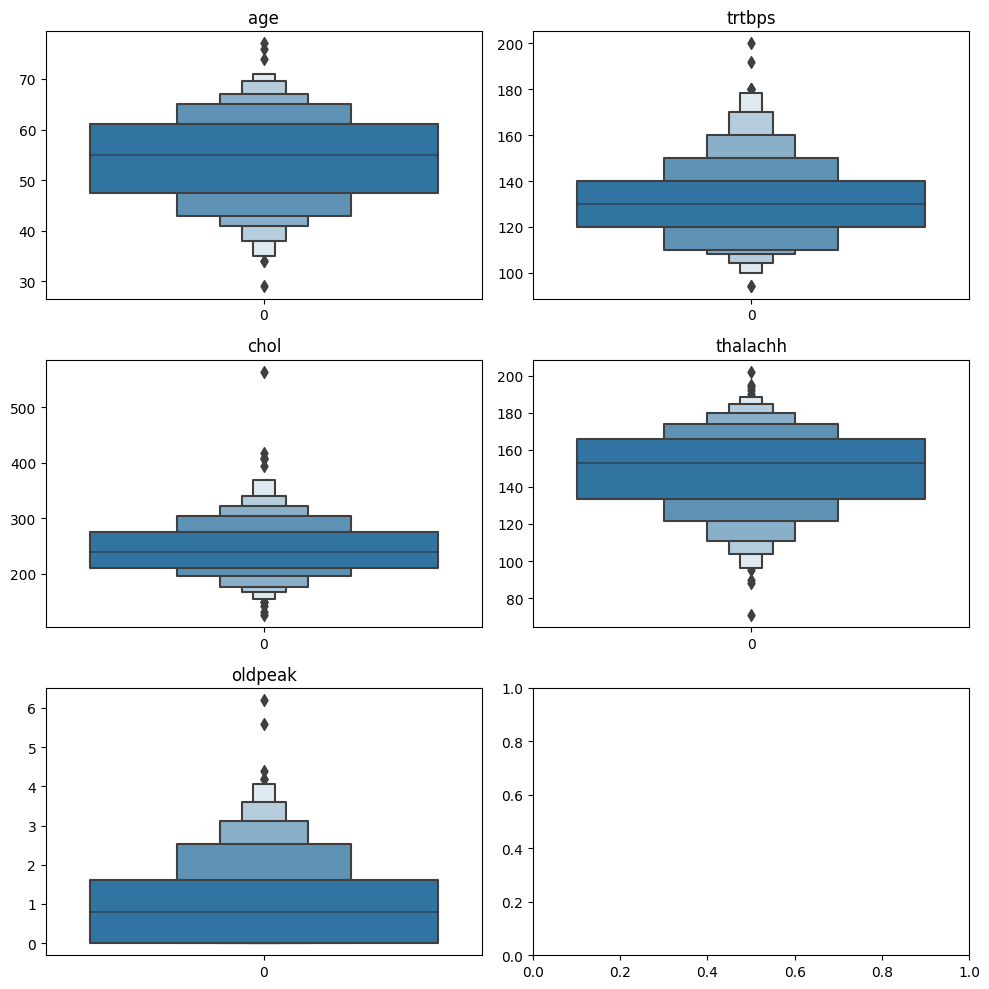

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  if i == 5:
    break
  sns.boxenplot(heart[num_cols[i]], ax = ax) # 수치형 -> box plot으로 시각화
  ax.set_title(f'{num_cols[i]}')


plt.tight_layout()
plt.show()

### target plotting

<Axes: xlabel='output', ylabel='count'>

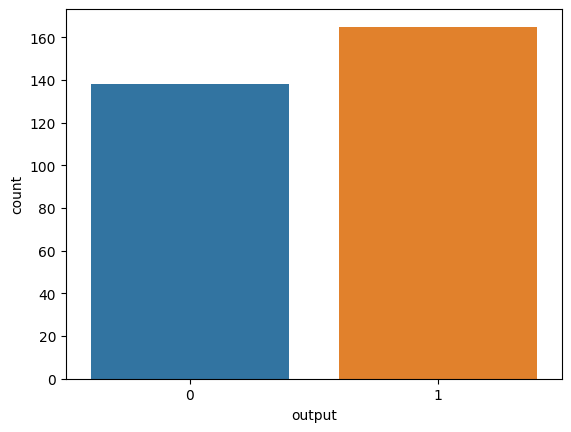

In [19]:
sns.countplot(data = heart,x = 'output') # 균등한 분포

## correlation matrix

<Axes: >

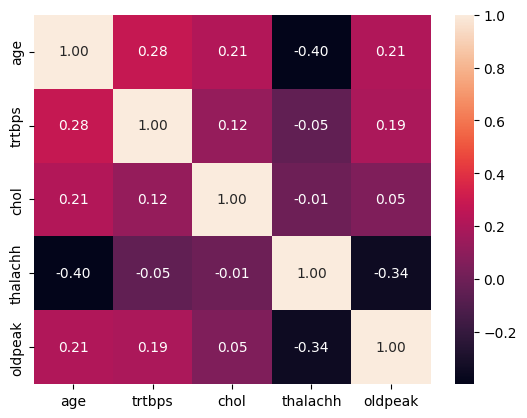

In [21]:
# numerical -> 다중공선성 유발할 변수 X
heart_corr = heart[num_cols].corr()
sns.heatmap(heart_corr, fmt='.2f',annot = True)

<Axes: >

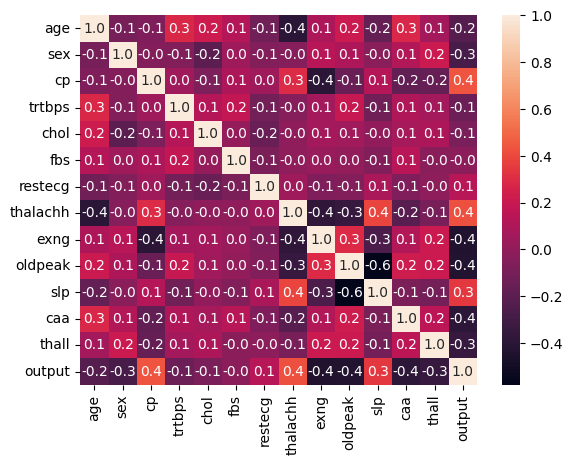

In [24]:
# all -> slp와 oldpeak의 상관계수가 가장 높음
heart_corr = heart.corr()
sns.heatmap(heart_corr, fmt='.1f',annot = True)

# preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
prep_heart = heart.copy()

# encoding categorical features
prep_heart = pd.get_dummies(prep_heart, columns = cat_cols, drop_first = True)

# scaling
scaler = StandardScaler()
prep_heart[num_cols] = scaler.fit_transform(prep_heart[num_cols])

# split X,y
X = prep_heart.drop(['output'], axis = 1)
y = prep_heart['output'] # target만 발라내기

prep_heart # 범주형 columns 전처리 & 표준화(평균 0 분산 1)

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [28]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [29]:
X_train

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
132,-1.363869,-0.663867,0.941846,0.540209,-0.896862,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
202,0.400752,1.049520,0.458709,-1.690047,-0.206705,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
196,-0.922713,1.049520,-0.294985,-0.115749,2.208842,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
75,0.069886,0.192827,0.072199,0.496478,0.310912,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
176,0.621330,-0.835206,-0.314310,0.452748,0.310912,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.478391,-0.256334,0.583939,-0.379244,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
71,-0.371269,-2.148802,-0.372287,0.190365,-0.896862,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.613930,1.620649,-0.237008,-0.815437,-0.810592,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
270,-0.922713,-0.663867,0.052874,-0.246940,-0.206705,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
X_test

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
179,0.290464,1.049520,0.574662,-1.646316,-0.379244,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
228,0.511041,2.191778,0.806568,0.409017,-0.724323,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
246,0.180175,0.135714,3.144951,0.015443,0.742260,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
60,1.834507,-1.234996,0.362082,-0.859167,-0.896862,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.613930,0.478391,0.149501,-0.159479,0.828529,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
104,-0.481558,-0.149851,-0.971377,0.583939,-0.896862,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
193,0.621330,0.763956,0.690615,-0.334401,1.518686,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1


In [31]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 242, dtype: int64

In [32]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

# Training

## Logistic Regression

### Q1. 아래 시그모이드 함수를 구현하세요

$\sigma(z) = \frac{1}{1 + e^{-z}}$


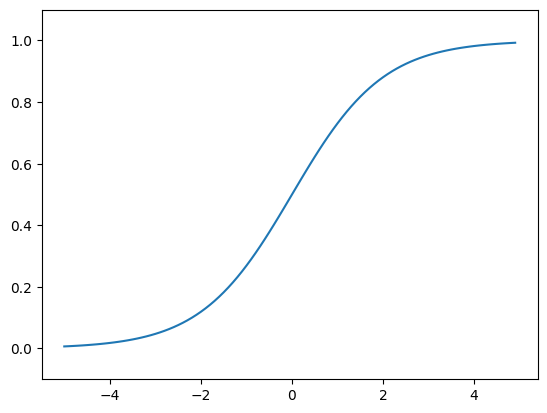

In [33]:
# Sigmoid 함수 정의
def sigmoid(z):
  return 1 / (1 +np.exp(-z))

# 정의한 함수 예시로 적용
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [34]:
sigmoid(1)

0.7310585786300049

### Q.2 Cross Entropy를 구현하세요.

In [44]:
# Binary Cross Entropy 정의
def BCE(y,y_pred):
  return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred), axis=0)

### Logistic Regression Model

In [45]:
# Logistic Regression model
def logistic_regression(X, y, num_iterations, learning_rate):
    num_features = X.shape[1] # X의 열
    weights = np.zeros(num_features)
    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Loss function
        cost = BCE(y,y_pred) # 위에서 정의한 Binary Cross Entropy 사용
        cost_history.append(cost)

        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        weights -= learning_rate * gradient

    return weights, cost_history

In [46]:
num_iterations = 10000
learning_rate = 0.01

weights, cost_history = logistic_regression(X_train, y_train, num_iterations, learning_rate)

print('Weights:', weights)
print('Final Cost:', cost_history[-1])

Weights: [ 0.05293664 -0.26835092 -0.07852607  0.33638329 -0.65871575 -0.91677142
  0.49887133  1.43812678  1.09054531  0.34738847  0.47143751  0.02420021
 -0.85299467 -0.13433424  0.7364544  -1.59062778 -1.42950524 -0.73335733
  0.25806157  0.26849969  0.98642513 -0.53499428]
Final Cost: 0.32138684149132635


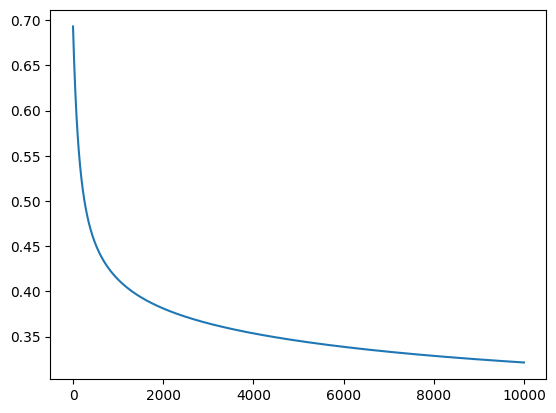

In [47]:
plt.plot(cost_history) # 반복할수록 점차 감소함

In [48]:
# Predict test data
z = np.dot(X_test, weights)
y_pred = np.round(sigmoid(z))

In [49]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [50]:
accuracy_score(y_test, y_pred) # 88% 정도의 정확도

0.8852459016393442

## KNN classification

 ### Q3. 거리 계산 함수에 대해 구현해보세요

In [55]:
# 유클리디안 거리 정의
def euclidean_distance(x1, x2):
  a = x1 - x2
  distance = np.dot(a.T, a) # 내적을 활용하여 거리 구하기
  return np.sqrt(distance)

# 예시

x1 = np.array((4,4))
x2 = np.array((5,3))
distance1 = euclidean_distance(x1, x2)
distance1

1.4142135623730951

In [57]:
# 맨해튼 거리 정의
def manhattan_distance(x1, x2):
    return np.abs(x1 - x2).sum()

# 예시

x1 = np.array([1, 2])
x2 = np.array([1, 4])
distance2 = manhattan_distance(x1, x2)
distance2

2

In [58]:
# KNN 분류기 구현
def KNN(X_train, y_train, X_test, k):
    y_pred = []

    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train.values] # 유클리디안 거리 사용
        sorted_indices = np.argsort(distances)[:k] # 근접한 순서로 정렬
        k_nearest_labels = y_train.iloc[sorted_indices] # 근접한 데이터 찾기
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
        y_pred.append(predicted_label)

    return np.array(y_pred)

In [59]:
k = 5
y_pred = KNN(X_train, y_train, X_test, k)

In [60]:
accuracy_score(y_test, y_pred) # 85% 정도의 정확도

0.8524590163934426

# Q4. sklearn의 Decision Tree를 사용해서 classification을 진행해보세요!

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [63]:
print(model.score(X_test, y_test)) # 72% 정도의 성능

0.7213114754098361


## Q5. 모델의 학습 결과에 대한 ROC curve를 그리고 AUC 값을 출력해보세요!

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [65]:
accuracy_score(y_test, y_pred)

0.7213114754098361

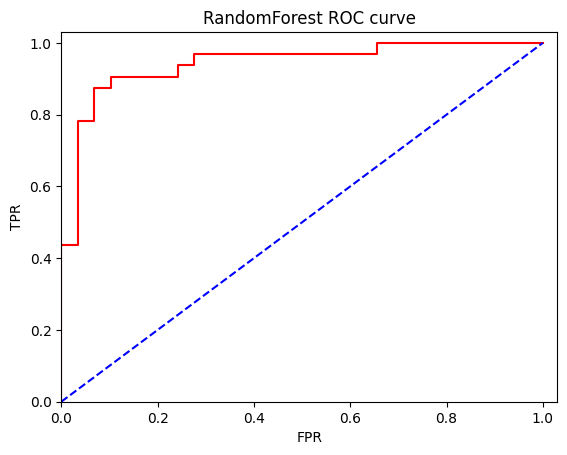

In [73]:
# calculating probability
model_new = LogisticRegression()
model_new.fit(X_train, y_train)
new_score = model_new.predict_proba(X_test)[:,1]

# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, new_score)
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0, 1.03])
plt.ylim([0.0, 1.03])
plt.title('RandomForest ROC curve')
plt.show()

In [75]:
# AUC

auc = roc_auc_score(y_test, model_new.predict_proba(X_test)[:,1])
auc # 94% 정도의 성능

0.9418103448275862

## Q6. Plot_tree를 이용해서 decision tree의 결과를 확인해 봅시다.

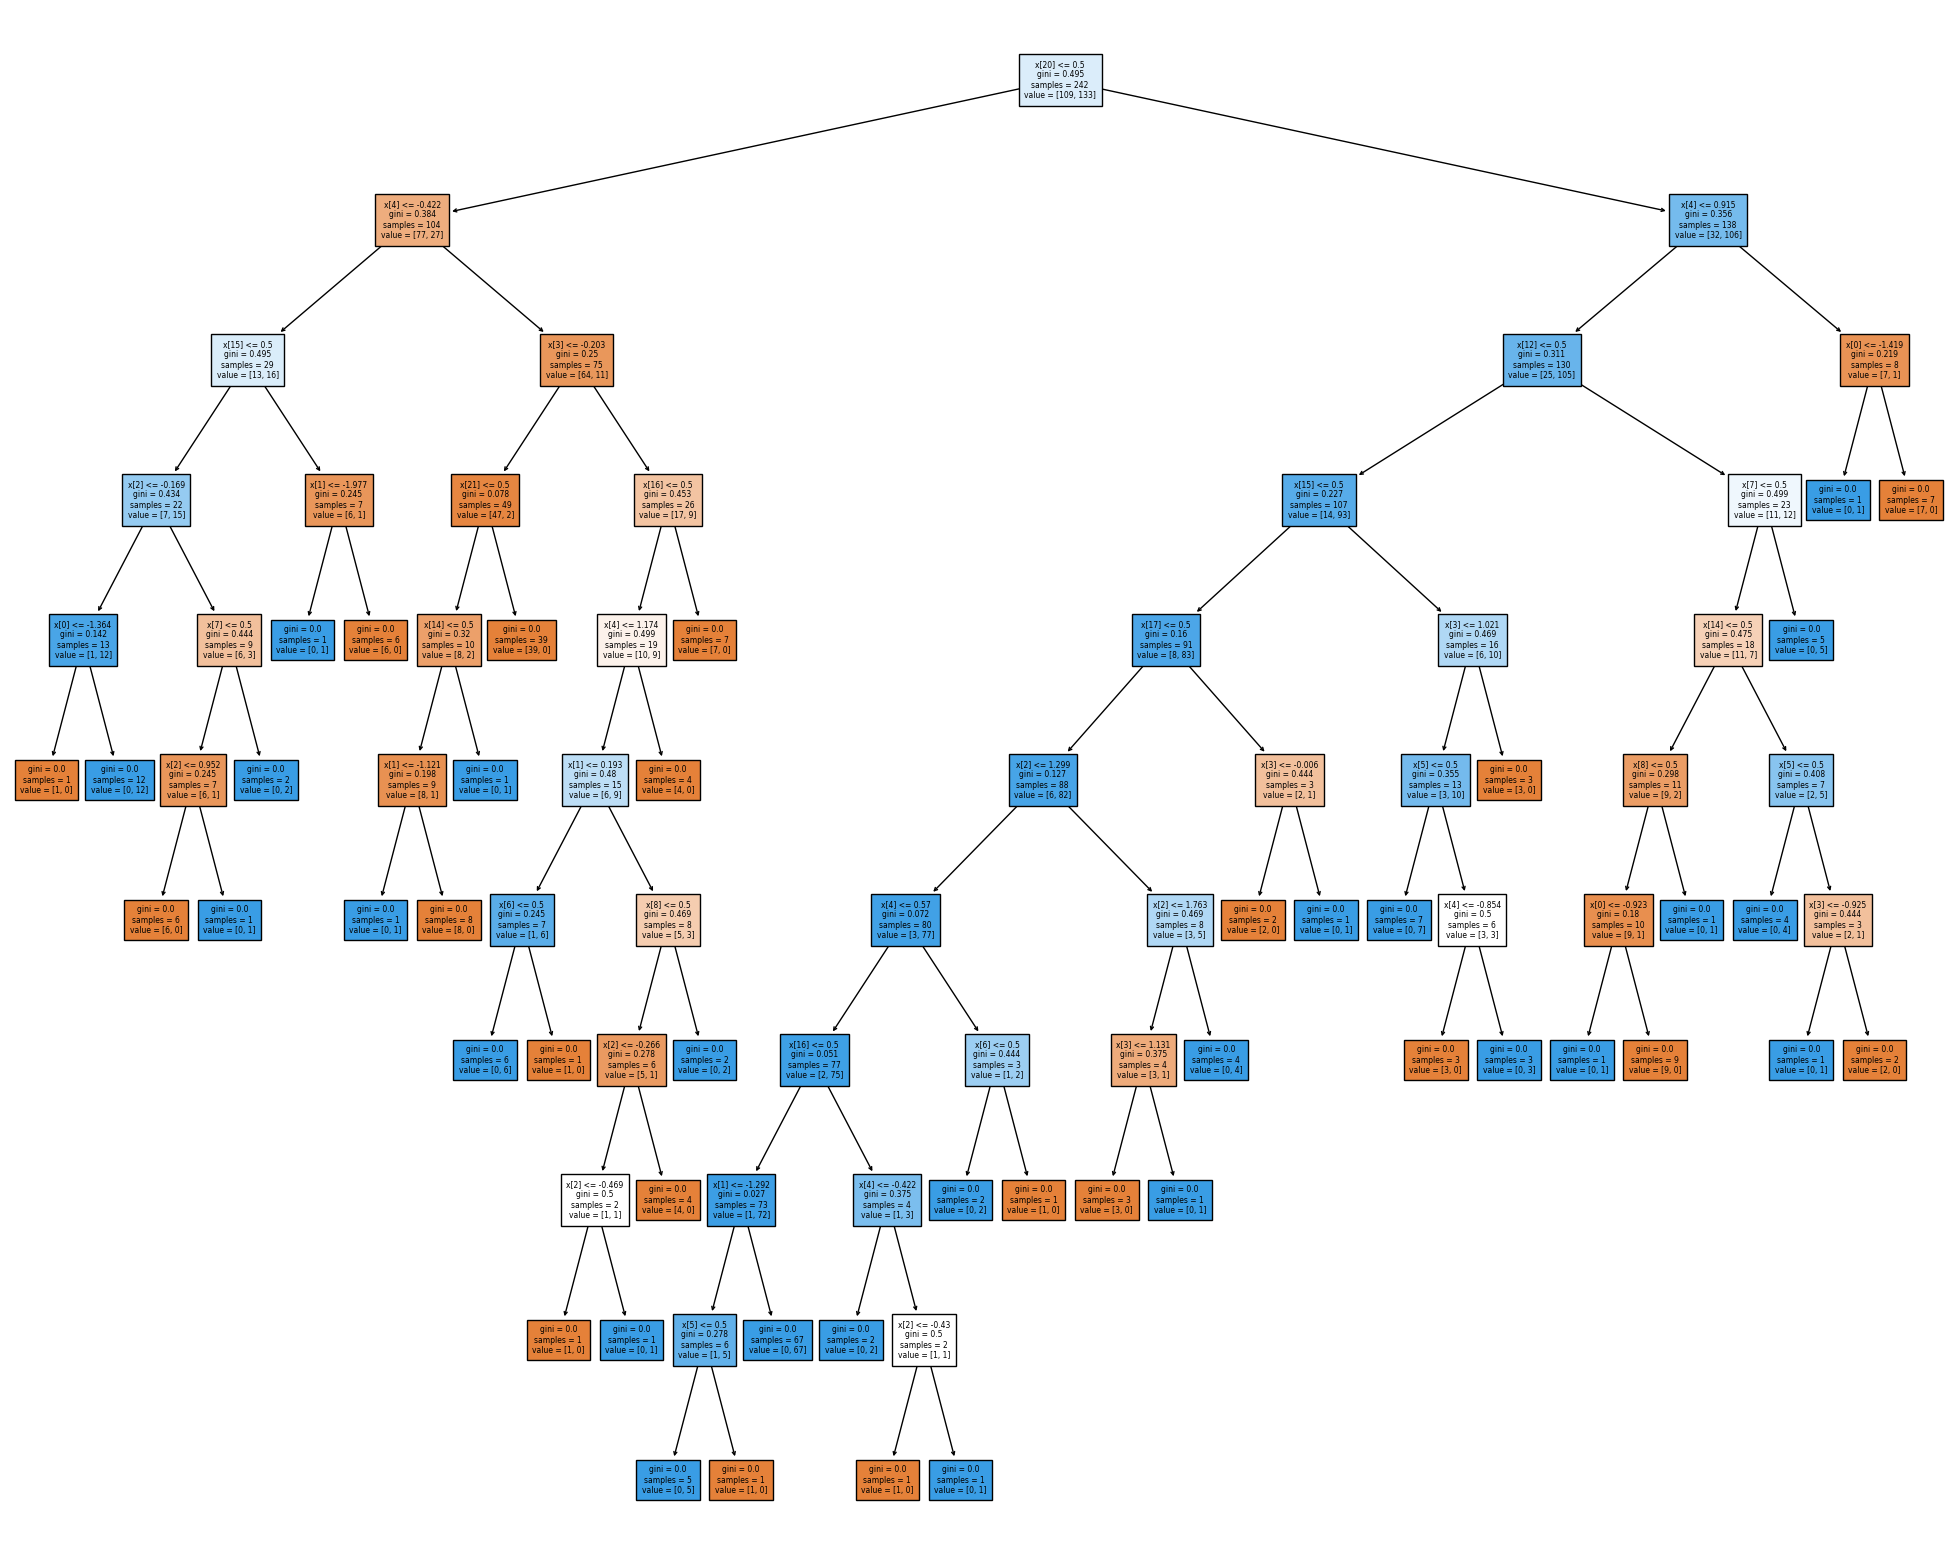

In [82]:
from sklearn.tree import plot_tree

plt.figure(figsize = (25, 20)) # 그래프 크기 조절
plot_tree(model, filled = True, fontsize = 5.5) # 노드 폰트 크기 조절
plt.show()